# ssha plots for tsunami simulations


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [91]:
## DO NOT CHANGE - combining the output .txt files after running samoa with points
import glob,os

used_cols=["x","y","time","h","b"]
X_ind=0
Y_ind=1
TIME_ind=2
H_ind=3
B_ind=4

def combineProbeOutput(filesuffix):
    
    files = glob.glob(filesuffix)
    df=pd.read_csv(files[0], header=0, delimiter=',', skipinitialspace=True, usecols=["x","y","time","h","b"])
    for file in files[0:]:
        df = df.append(pd.read_csv(file,header=0,delimiter=',',skipinitialspace=True))
    return df[["x","y","time","h","b"]]

In [92]:
## checking data format from single txt file
path_complex_east = r'/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_complex_east_M6.68_points/flash_20210407_235_d18_cou.5000000000000_dry.0010197671363_pointoutput_99.txt'
data_test = pd.read_csv(path_complex_east)
data_test.head()

,x,y,z,p(1),p(2),h,b,dist_to_cell_center,time
0,664600.0,7329000.0,0.0,-0.138865,-0.082556,5.555731,-5.577474,0.000702,990.0
1,664500.0,7329200.0,0.0,0.037254,-0.008244,7.308373,-7.311189,0.000665,990.0
2,664100.0,7328700.0,0.0,0.273956,-0.188824,12.931812,-12.939581,0.001369,990.0
3,614501.0,7318500.0,0.0,0.006331,0.024507,12.085735,-12.082755,0.000192,990.0
4,614301.0,7318501.0,0.0,-0.020947,0.018118,13.382472,-13.377760,0.000395,990.0


In [93]:
## combine your output and sort by time - adjust path below
# c = complex
# s = simple
# E = East
# M = Middle
# W = West
data_cE = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_complex_east_M6.68_points/*pointoutput*.txt")
data_cE.sort_values(['time'], inplace=True)

data_cM = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_complex_middle_M7.07_points/*pointoutput*.txt")
data_cM.sort_values(['time'], inplace=True)

data_cW = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_complex_west_M6.74_points/*pointoutput*.txt")
data_cW.sort_values(['time'], inplace=True)

data_sE = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_simple_east_M7.34_points/*pointoutput*.txt")
data_sE.sort_values(['time'], inplace=True)

data_sM = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_simple_middle_M7.33_points/*pointoutput*.txt")
data_sM.sort_values(['time'], inplace=True)

data_sW = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/outputSamoa_tanioka_simple_west_M7.34_points/*pointoutput*.txt")
data_sW.sort_values(['time'], inplace=True)

In [94]:
## OLD APPROACH 
#compute sea surface height (deviation from mean sea level)
WATER_LEVEL_ind=5
SSHA_ind=6

def addData(df):
    df['waterlevel']=df['h']+df['b']
    df['ssha']=df.apply(lambda row: row['waterlevel'] if row['b'] <= 0.000 else row["h"],axis=1)
    return df

In [95]:
# NEW EQUATION FROM LEO
def appendSSHA(df):
    #df = df.sort_values(by=["time","y","x"])
    df.loc[:,"ssha"] = df.loc[:,"h"] + df.loc[:,"b"] 
    df.loc[df.loc[:,"b"] > 0,"ssha"] = df.loc[:,"h"]
    df['ssha'] = df['ssha']*100 # conversion from [m] to [cm]
    df["time"] = df.time/60 # conversion from [s] to [min]
    # necassary to convert from float to int to avoid errors later on
    df['x'] = df['x'].astype(int)
    df['y'] = df['y'].astype(int)
    return df

In [96]:
data_cE = appendSSHA(data_cE)
data_cM = appendSSHA(data_cM)
data_cW = appendSSHA(data_cW)
data_sE = appendSSHA(data_sE)
data_sM = appendSSHA(data_sM)
data_sW = appendSSHA(data_sW)

In [97]:
column_values = data_cE[["x"]].values

unique_values =  np.unique(column_values)
print(unique_values)
print(len(unique_values))

[595000 595100 595610 596010 608000 608100 608420 608620 613300 614300
 614301 614501 631700 632000 632200 632500 632700 632800 633500 664100
 664500 664600]
22


In [98]:
column_values = data_cE[["y"]].values

unique_values =  np.unique(column_values)
print(unique_values)
print(len(unique_values))

[7289600 7289601 7292000 7292100 7292200 7318400 7318500 7318501 7328700
 7329000 7329200 7332100 7332300 7333020 7333420 7338300 7338400 7341010
 7342010 7381000 7381600]
21


###### note for myself
Total stations: 22

x 	y 	time 	h 	b 	waterlevel 	ssha

    Sig
595000 	7338300 	0.0 	4.770116 	-3.219845 	155.027144 	1.550271  --> -  
595100 	7338400 	0.0 	8.291017 	-7.758359 	53.265737 	0.532657  --> -  
595610 	7341010 	0.0 	27.636965 	-27.636965 	0.000000 	0.000000  
596010 	7342010 	0.0 	22.827670 	-22.827670 	0.000000 	0.000000  

    Olaf  
608000 	7332100 	0.0 	9.009866 	-5.012450 	399.741543 	3.997415  --> -  
608100 	7332300 	0.0 	16.483257 	-16.483257 	0.000000 	0.000000    
608420 	7333020 	0.0 	30.915094 	-30.915094 	0.000000 	0.000000    
608620 	7333420 	0.0 	35.190560 	-35.190560 	0.000000 	0.000000  

    Dalvik  
613300 	7318400 	0.0 	5.180788 	-5.180788 	0.000000 	0.000000  
614300 	7318400 	0.0 	10.929119 	-10.929119 	0.000000 	0.000000  
614301 	7318501 	0.0 	13.371404 	-13.371404 	0.000000 	0.000000  
614501 	7318500 	0.0 	12.076183 	-12.076183 	0.000000 	0.000000  

    Akureyri  
631700 	7292000 	0.0 	22.445669 	-21.943884 	50.178460 	0.501785  --> -   
632000 	7292100 	0.0 	37.141219 	-37.141219 	0.000000 	0.000000  
632200 	7292200 	0.0 	45.500215 	-45.500215 	0.000000 	0.000000  
632700 	7289601 	0.0 	13.293154 	-12.042989 	125.016487 	1.250165  --> -  
632800 	7289600 	0.0 	19.242537 	-18.934226 	30.831164 	0.308312  --> -  

    Grimsey 
632500 	7381600 	0.0 	11.259042 	-11.259042 	0.000000 	0.000000 
633500 	7381000 	0.0 	10.304572 	-10.304572 	0.000000 	0.000000  

    Husavik  
664100 	7328700 	0.0 	12.917609 	-12.917609 	0.000000 	0.000000  
664500 	7329200 	0.0 	7.298772 	-7.298772 	0.000000 	0.000000  
664600 	7329000 	0.0 	5.569958 	-5.569958 	0.000000 	0.000000  

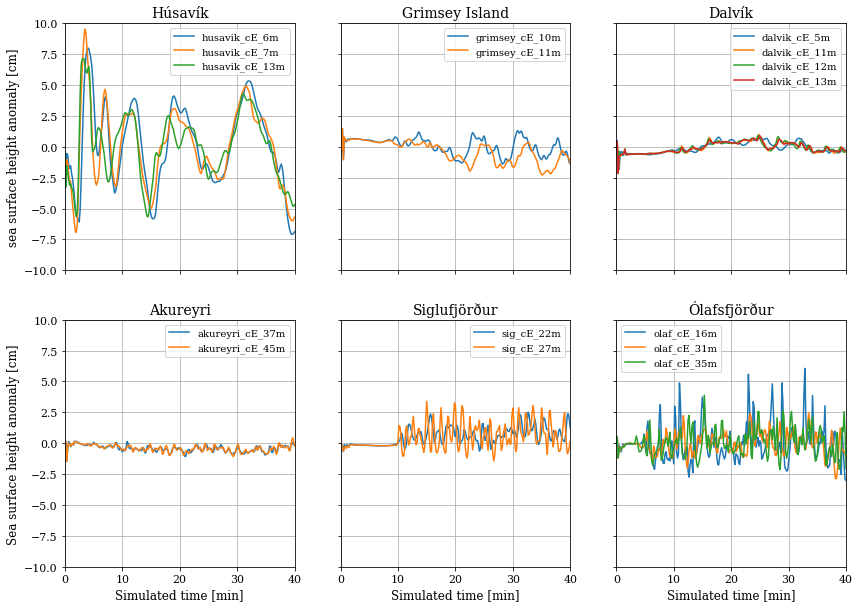

<Figure size 432x288 with 0 Axes>

In [123]:
### TESTING
sig_cE_22m = data_cE.loc[(data_cE["x"].eq(596010))] 
sig_cE_27m = data_cE.loc[(data_cE["x"].eq(595610))]

olaf_cE_16m = data_cE.loc[(data_cE["x"].eq(608100))] 
olaf_cE_31m = data_cE.loc[(data_cE["x"].eq(608420))]
olaf_cE_35m = data_cE.loc[(data_cE["x"].eq(608620))]

dalvik_cE_5m = data_cE.loc[(data_cE["x"].eq(613300))]
dalvik_cE_11m = data_cE.loc[(data_cE["x"].eq(614300))]
dalvik_cE_12m = data_cE.loc[(data_cE["x"].eq(614501))]
dalvik_cE_13m = data_cE.loc[(data_cE["x"].eq(614301))]

akureyri_cE_37m = data_cE.loc[(data_cE["x"].eq(632000))]
akureyri_cE_45m = data_cE.loc[(data_cE["x"].eq(632200))]

grimsey_cE_10m = data_cE.loc[(data_cE["x"].eq(633500))]
grimsey_cE_11m = data_cE.loc[(data_cE["x"].eq(632500))]

husavik_cE_6m = data_cE.loc[(data_cE["x"].eq(664600))] 
husavik_cE_7m = data_cE.loc[(data_cE["x"].eq(664500))]
husavik_cE_13m = data_cE.loc[(data_cE["x"].eq(664100))]

### PLOTTING
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(14,10))
fig.set_figwidth(14)
ax1.set_xlim([0,40])
#ax1.set_ylim([-60,40]) # simple
ax1.set_ylim([-10,10]) # complex


ax1.plot(husavik_cE_6m.time, husavik_cE_6m.ssha, label="husavik_cE_6m")
ax1.plot(husavik_cE_7m.time, husavik_cE_7m.ssha, label="husavik_cE_7m")
ax1.plot(husavik_cE_13m.time, husavik_cE_13m.ssha, label="husavik_cE_13m")
ax1.legend()
ax1.set_ylabel("sea surface height anomaly [cm]", fontsize=12)
ax1.set_title("Húsavík", fontsize=14)
ax1.grid()


ax2.plot(grimsey_cE_10m.time, grimsey_cE_10m.ssha, label="grimsey_cE_10m")
ax2.plot(grimsey_cE_11m.time, grimsey_cE_11m.ssha, label="grimsey_cE_11m")
ax2.legend()
ax2.set_title("Grimsey Island", fontsize=14)
ax2.grid()


#ax3.plot(husavik.time, husavik.ssha, label="H\372sav\355k 7m")
ax3.plot(dalvik_cE_5m.time, dalvik_cE_5m.ssha, label="dalvik_cE_5m")
ax3.plot(dalvik_cE_11m.time, dalvik_cE_11m.ssha, label="dalvik_cE_11m")
ax3.plot(dalvik_cE_12m.time, dalvik_cE_12m.ssha, label="dalvik_cE_12m")
ax3.plot(dalvik_cE_13m.time, dalvik_cE_13m.ssha, label="dalvik_cE_13m")
ax3.legend()
ax3.set_title("Dalvík", fontsize=14)
ax3.grid()


ax4.plot(akureyri_cE_37m.time, akureyri_cE_37m.ssha, label="akureyri_cE_37m")
ax4.plot(akureyri_cE_45m.time, akureyri_cE_45m.ssha, label="akureyri_cE_45m")
ax4.legend()
ax4.set_ylabel("Sea surface height anomaly [cm]", fontsize=12)
ax4.set_xlabel("Simulated time [min]", fontsize=12)
ax4.set_title("Akureyri", fontsize=14)
ax4.grid()


ax5.plot(sig_cE_22m.time, sig_cE_22m.ssha, label="sig_cE_22m")
ax5.plot(sig_cE_27m.time, sig_cE_27m.ssha, label="sig_cE_27m")
ax5.legend()
ax5.set_xlabel("Simulated time [min]", fontsize=12)
ax5.set_title("Siglufjörður", fontsize=14)
ax5.grid()


ax6.plot(olaf_cE_16m.time, olaf_cE_16m.ssha, label="olaf_cE_16m")
ax6.plot(olaf_cE_31m.time, olaf_cE_31m.ssha, label="olaf_cE_31m")
ax6.plot(olaf_cE_35m.time, olaf_cE_35m.ssha, label="olaf_cE_35m")
ax6.legend()
ax6.set_xlabel("Simulated time [min]", fontsize=12)
ax6.set_title("Ólafsfjörður", fontsize=14)
ax6.grid()

plt.show()
plt.clf()

In [ ]:
### IMPORTANT EXECUTE

#Husavik for each scenario
husavik_cE = data_cE.loc[(data_cE["x"].eq(664500) & data_cE["y"].eq(7329200))]
husavik_cM = data_cM.loc[(data_cM["x"].eq(664500) & data_cM["y"].eq(7329200))]
husavik_cW = data_cW.loc[(data_cW["x"].eq(664500) & data_cW["y"].eq(7329200))]
husavik_sE = data_sE.loc[(data_sE["x"].eq(664500) & data_sE["y"].eq(7329200))]
husavik_sM = data_sM.loc[(data_sM["x"].eq(664500) & data_sM["y"].eq(7329200))]
husavik_sW = data_sW.loc[(data_sW["x"].eq(664500) & data_sW["y"].eq(7329200))]

#Grimsey
grimsey_cE = data_cE.loc[(data_cE["x"].eq(633500) & data_cE["y"].eq(7381000))]
grimsey_cM = data_cM.loc[(data_cM["x"].eq(633500) & data_cM["y"].eq(7381000))]
grimsey_cW = data_cW.loc[(data_cW["x"].eq(633500) & data_cW["y"].eq(7381000))]
grimsey_sE = data_sE.loc[(data_sE["x"].eq(633500) & data_sE["y"].eq(7381000))]
grimsey_sM = data_sM.loc[(data_sM["x"].eq(633500) & data_sM["y"].eq(7381000))]
grimsey_sW = data_sW.loc[(data_sW["x"].eq(633500) & data_sW["y"].eq(7381000))]

#Dalvik
dalvik_cE = data_cE.loc[(data_cE["x"].eq(614501) & data_cE["y"].eq(7318499))]
dalvik_cM = data_cM.loc[(data_cM["x"].eq(614501) & data_cM["y"].eq(7318499))]
dalvik_cW = data_cW.loc[(data_cW["x"].eq(614501) & data_cW["y"].eq(7318499))]
dalvik_sE = data_sE.loc[(data_sE["x"].eq(614501) & data_sE["y"].eq(7318499))]
dalvik_sM = data_sM.loc[(data_sM["x"].eq(614501) & data_sM["y"].eq(7318499))]
dalvik_sW = data_sW.loc[(data_sW["x"].eq(614501) & data_sW["y"].eq(7318499))]

#Akureyri
akureyri_cE = data_cE.loc[(data_cE["x"].eq(632200) & data_cE["y"].eq(7292200))]
akureyri_cM = data_cM.loc[(data_cM["x"].eq(632200) & data_cM["y"].eq(7292200))]
akureyri_cW = data_cW.loc[(data_cW["x"].eq(632200) & data_cW["y"].eq(7292200))]
akureyri_sE = data_sE.loc[(data_sE["x"].eq(632200) & data_sE["y"].eq(7292200))]
akureyri_sM = data_sM.loc[(data_sM["x"].eq(632200) & data_sM["y"].eq(7292200))]
akureyri_sW = data_sW.loc[(data_sW["x"].eq(632200) & data_sW["y"].eq(7292200))]

#Sig
sig_cE = data_cE.loc[(data_cE["x"].eq(596009) & data_cE["y"].eq(7342010))]
sig_cM = data_cM.loc[(data_cM["x"].eq(596009) & data_cM["y"].eq(7342010))]
sig_cW = data_cW.loc[(data_cW["x"].eq(596009) & data_cW["y"].eq(7342010))]
sig_sE = data_sE.loc[(data_sE["x"].eq(596009) & data_sE["y"].eq(7342010))]
sig_sM = data_sM.loc[(data_sM["x"].eq(596009) & data_sM["y"].eq(7342010))]
sig_sW = data_sW.loc[(data_sW["x"].eq(596009) & data_sW["y"].eq(7342010))]
#    596009 7342010 b=22.8m -   scheint besser zu sein
#    595609 7341010 b=27.6m -   knapp 30 aber unruhiger -20 bis 25

#Olaf
olaf_cE = data_cE.loc[(data_cE["x"].eq(608100) & data_cE["y"].eq(7332300))]
olaf_cM = data_cM.loc[(data_cM["x"].eq(608100) & data_cM["y"].eq(7332300))]
olaf_cW = data_cW.loc[(data_cW["x"].eq(608100) & data_cW["y"].eq(7332300))]
olaf_sE = data_sE.loc[(data_sE["x"].eq(608100) & data_sE["y"].eq(7332300))]
olaf_sM = data_sM.loc[(data_sM["x"].eq(608100) & data_sM["y"].eq(7332300))]
olaf_sW = data_sW.loc[(data_sW["x"].eq(608100) & data_sW["y"].eq(7332300))]



In [ ]:
### PLOT 1

#plt.xlim([0, 40])
#plt.ylim([-30, 40])
plt.figure(figsize=(12,12)) 

plt.suptitle("SSH - comparison for different locations")
plt.subplot(3,2,1)
plt.plot(husavik_cE.time, husavik_cE.ssha, label="cE")
plt.plot(husavik_cM.time, husavik_cM.ssha, label="cM")
plt.plot(husavik_cW.time, husavik_cW.ssha, label="cW")
plt.plot(husavik_sE.time, husavik_sE.ssha, label="sE")
plt.plot(husavik_sM.time, husavik_sM.ssha, label="sM")
plt.plot(husavik_sW.time, husavik_sW.ssha, label="sW")
#plt.plot(husavik.time, husavik.ssha, label="H\372sav\355k 7m")
plt.legend()
plt.ylabel("sea surface height [cm]")
plt.title("Húsavík")

plt.subplot(3,2,2)
plt.plot(grimsey_cE.time, grimsey_cE.ssha, label="cE")
plt.plot(grimsey_cM.time, grimsey_cM.ssha, label="cM")
plt.plot(grimsey_cW.time, grimsey_cW.ssha, label="cW")
plt.plot(grimsey_sE.time, grimsey_sE.ssha, label="sE")
plt.plot(grimsey_sM.time, grimsey_sM.ssha, label="sM")
plt.plot(grimsey_sW.time, grimsey_sW.ssha, label="sW")
plt.legend()
plt.title("Grímsey Island")

plt.subplot(3,2,3)
plt.plot(dalvik_cE.time, dalvik_cE.ssha, label="cE")
plt.plot(dalvik_cM.time, dalvik_cM.ssha, label="cM")
plt.plot(dalvik_cW.time, dalvik_cW.ssha, label="cW")
plt.plot(dalvik_sE.time, dalvik_sE.ssha, label="sE")
plt.plot(dalvik_sM.time, dalvik_sM.ssha, label="sM")
plt.plot(dalvik_sW.time, dalvik_sW.ssha, label="sW")
plt.legend()
plt.ylabel("sea surface height [cm]")
plt.title("Dalvík")

plt.subplot(3,2,4)
plt.plot(akureyri_cE.time, akureyri_cE.ssha, label="cE")
plt.plot(akureyri_cM.time, akureyri_cM.ssha, label="cM")
plt.plot(akureyri_cW.time, akureyri_cW.ssha, label="cW")
plt.plot(akureyri_sE.time, akureyri_sE.ssha, label="sE")
plt.plot(akureyri_sM.time, akureyri_sM.ssha, label="sM")
plt.plot(akureyri_sW.time, akureyri_sW.ssha, label="sW")
plt.legend()
plt.title("Akureyri")

plt.subplot(3,2,5)
plt.plot(sig_cE.time, sig_cE.ssha, label="cE")
plt.plot(sig_cM.time, sig_cM.ssha, label="cM")
plt.plot(sig_cW.time, sig_cW.ssha, label="cW")
plt.plot(sig_sE.time, sig_sE.ssha, label="sE")
plt.plot(sig_sM.time, sig_sM.ssha, label="sM")
plt.plot(sig_sW.time, sig_sW.ssha, label="sW")
plt.legend(loc='lower right')
plt.ylabel("sea surface height [cm]")
plt.xlabel("simulated time [min]")
plt.title("Siglufjörður")

plt.subplot(3,2,6)
plt.plot(olaf_cE.time, olaf_cE.ssha, label="cE")
plt.plot(olaf_cM.time, olaf_cM.ssha, label="cM")
plt.plot(olaf_cW.time, olaf_cW.ssha, label="cW")
plt.plot(olaf_sE.time, olaf_sE.ssha, label="sE")
plt.plot(olaf_sM.time, olaf_sM.ssha, label="sM")
plt.plot(olaf_sW.time, olaf_sW.ssha, label="sW")
plt.legend()
plt.xlabel("simulated time [min]")
plt.title("Ólafsfjörður ")


plt.show()
#plt.savefig("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/EGU_figures/ssh_comparison_multiple_locations_v1.png", dpi = 600)
plt.clf()

In [ ]:
### PLOT 4

#plt.xlim([0, 40])
#plt.ylim([-30, 40])
plt.figure(figsize=(18,3)) 

#plt.suptitle("SSH - comparison for different locations")
plt.subplot(1,3,1)
plt.plot(sig_cE.time, sig_cE.waterlevel, label="cE")
plt.plot(sig_cM.time, sig_cM.waterlevel, label="cM")
plt.plot(sig_cW.time, sig_cW.waterlevel, label="cW")
plt.plot(sig_sE.time, sig_sE.waterlevel, label="sE")
plt.plot(sig_sM.time, sig_sM.waterlevel, label="sM")
plt.plot(sig_sW.time, sig_sW.waterlevel, label="sW")
plt.legend(loc='lower right')
plt.ylabel("sea surface height [cm]")
plt.xlabel("simulated time [min]")
plt.title("Siglufjörður")
plt.xlim([0, 40])
plt.ylim([-60, 40])

plt.subplot(1,3,2)
plt.plot(olaf_cE.time, olaf_cE.waterlevel, label="cE")
plt.plot(olaf_cM.time, olaf_cM.waterlevel, label="cM")
plt.plot(olaf_cW.time, olaf_cW.waterlevel, label="cW")
plt.plot(olaf_sE.time, olaf_sE.waterlevel, label="sE")
plt.plot(olaf_sM.time, olaf_sM.waterlevel, label="sM")
plt.plot(olaf_sW.time, olaf_sW.waterlevel, label="sW")
plt.legend()
plt.xlabel("simulated time [min]")
plt.title("Ólafsfjörður ")
plt.legend(loc='lower right')
plt.xlim([0, 40])
plt.ylim([-60, 40])

plt.subplot(1,3,3)
plt.plot(husavik_cE.time, husavik_cE.waterlevel, label="cE")
plt.plot(husavik_cM.time, husavik_cM.waterlevel, label="cM")
plt.plot(husavik_cW.time, husavik_cW.waterlevel, label="cW")
plt.plot(husavik_sE.time, husavik_sE.waterlevel, label="sE")
plt.plot(husavik_sM.time, husavik_sM.waterlevel, label="sM")
plt.plot(husavik_sW.time, husavik_sW.waterlevel, label="sW")
#plt.plot(husavik.time, husavik.waterlevel, label="H\372sav\355k 7m")
plt.legend()
plt.title("Húsavík")
plt.xlabel("simulated time [min]")
plt.legend(loc='lower right')
plt.xlim([0, 40])
plt.ylim([-60, 40])


plt.show()
#plt.savefig("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/EGU_figures/ssh_comparison_multiple_locations_v4.png", dpi = 600)
plt.clf()

In [ ]:
### PLOT 2


plt.figure(figsize=(20,15)) 

plt.suptitle("SSH - comparison for different locations")
plt.subplot(2,3,1)
plt.plot(husavik_cE.time, husavik_cE.waterlevel, label="husavik_cE")
plt.plot(husavik_cM.time, husavik_cM.waterlevel, label="husavik_cM")
plt.plot(husavik_cW.time, husavik_cW.waterlevel, label="husavik_cW")
plt.plot(husavik_sE.time, husavik_sE.waterlevel, label="husavik_sE")
plt.plot(husavik_sM.time, husavik_sM.waterlevel, label="husavik_sM")
plt.plot(husavik_sW.time, husavik_sW.waterlevel, label="husavik_sW")
#plt.plot(husavik.time, husavik.waterlevel, label="H\372sav\355k 7m")
#plt.legend()
plt.ylabel("sea surface height [cm]")
plt.title("Húsavík")
plt.xlim([0, 40])
plt.ylim([-60, 40])

plt.subplot(2,3,2)
plt.plot(grimsey_cE.time, grimsey_cE.waterlevel, label="grimsey_cE")
plt.plot(grimsey_cM.time, grimsey_cM.waterlevel, label="grimsey_cM")
plt.plot(grimsey_cW.time, grimsey_cW.waterlevel, label="grimsey_cW")
plt.plot(grimsey_sE.time, grimsey_sE.waterlevel, label="grimsey_sE")
plt.plot(grimsey_sM.time, grimsey_sM.waterlevel, label="grimsey_sM")
plt.plot(grimsey_sW.time, grimsey_sW.waterlevel, label="grimsey_sW")
#plt.legend()
plt.title("Grímsey Island")
plt.xlim([0, 40])
plt.ylim([-60, 40])

plt.subplot(2,3,3)
plt.plot(dalvik_cE.time, dalvik_cE.waterlevel, label="dalvik_cE")
plt.plot(dalvik_cM.time, dalvik_cM.waterlevel, label="dalvik_cM")
plt.plot(dalvik_cW.time, dalvik_cW.waterlevel, label="dalvik_cW")
plt.plot(dalvik_sE.time, dalvik_sE.waterlevel, label="dalvik_sE")
plt.plot(dalvik_sM.time, dalvik_sM.waterlevel, label="dalvik_sM")
plt.plot(dalvik_sW.time, dalvik_sW.waterlevel, label="dalvik_sW")
#plt.legend()
plt.title("Dalvík")
plt.xlim([0, 40])
plt.ylim([-60, 40])

plt.subplot(2,3,4)
plt.plot(akureyri_cE.time, akureyri_cE.waterlevel, label="akureyri_cE")
plt.plot(akureyri_cM.time, akureyri_cM.waterlevel, label="akureyri_cM")
plt.plot(akureyri_cW.time, akureyri_cW.waterlevel, label="akureyri_cW")
plt.plot(akureyri_sE.time, akureyri_sE.waterlevel, label="akureyri_sE")
plt.plot(akureyri_sM.time, akureyri_sM.waterlevel, label="akureyri_sM")
plt.plot(akureyri_sW.time, akureyri_sW.waterlevel, label="akureyri_sW")
#plt.legend()
plt.xlabel("simulated time [min]")
plt.ylabel("sea surface height [cm]")
plt.title("Akureyri")
plt.xlim([0, 40])
plt.ylim([-60, 40])

plt.subplot(2,3,5)
#plt.plot(sig_cE.time, sig_cE.waterlevel, label="sig_cE")
#plt.plot(sig_cM.time, sig_cM.waterlevel, label="sig_cM")
#plt.plot(sig_cW.time, sig_cW.waterlevel, label="sig_cW")
#plt.plot(sig_sE.time, sig_sE.waterlevel, label="sig_sE")
#plt.plot(sig_sM.time, sig_sM.waterlevel, label="sig_sM")
#plt.plot(sig_sW.time, sig_sW.waterlevel, label="sig_sW")
plt.plot(sig_cE.time, sig_cE.waterlevel, label="complex East")
plt.plot(sig_cM.time, sig_cM.waterlevel, label="complex Middle")
plt.plot(sig_cW.time, sig_cW.waterlevel, label="complex West")
plt.plot(sig_sE.time, sig_sE.waterlevel, label="simple East")
plt.plot(sig_sM.time, sig_sM.waterlevel, label="simple Middle")
plt.plot(sig_sW.time, sig_sW.waterlevel, label="simple West")
#plt.legend()
plt.xlabel("simulated time [min]")
plt.title("Siglufjörður")
plt.xlim([0, 40])
plt.ylim([-60, 40])
##legend for all
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.35), ncol=2, fontsize=15)

plt.subplot(2,3,6)
plt.plot(olaf_cE.time, olaf_cE.waterlevel, label="olaf_cE")
plt.plot(olaf_cM.time, olaf_cM.waterlevel, label="olaf_cM")
plt.plot(olaf_cW.time, olaf_cW.waterlevel, label="olaf_cW")
plt.plot(olaf_sE.time, olaf_sE.waterlevel, label="olaf_sE")
plt.plot(olaf_sM.time, olaf_sM.waterlevel, label="olaf_sM")
plt.plot(olaf_sW.time, olaf_sW.waterlevel, label="olaf_sW")
#plt.legend()
plt.xlabel("simulated time [min]")
plt.title("Ólafsfjörður ")
plt.xlim([0, 40])
plt.ylim([-60, 40])

#test for a single legend outside
#plt.legend()


plt.show()
#plt.savefig("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/EGU_figures/ssh_comparison_multiple_locations_v2.png", dpi = 600)
#bbox_extra_artists=(lg,), 
#bbox_inches='tight'))
plt.clf()

In [ ]:
### PLOT 3


plt.figure(figsize=(20,15)) 

plt.suptitle("SSH - comparison for different locations")

plt.subplot(2,2,1)
plt.plot(sig_sE.time, sig_sE.waterlevel, label="simple East", color="red")
plt.plot(sig_sM.time, sig_sM.waterlevel, label="simple Middle")
plt.plot(sig_sW.time, sig_sW.waterlevel, label="simple West")
#plt.legend()
plt.ylabel("sea surface height [cm]", fontsize=14)
plt.title("Siglufjörður", fontsize=14)
plt.xlim([0, 40])
plt.ylim([-60, 40])
##legend for all


plt.subplot(2,2,2)
plt.plot(olaf_sE.time, olaf_sE.waterlevel, label="olaf_sE", color="red")
plt.plot(olaf_sM.time, olaf_sM.waterlevel, label="olaf_sM")
plt.plot(olaf_sW.time, olaf_sW.waterlevel, label="olaf_sW")
#plt.legend()
#plt.xlabel("simulated time [min]")
plt.title("Ólafsfjörður", fontsize=14)
plt.xlim([0, 40])
plt.ylim([-60, 40])

plt.subplot(2,2,3)
plt.plot(husavik_sE.time, husavik_sE.waterlevel, label="husavik_sE", color="red")
plt.plot(husavik_sM.time, husavik_sM.waterlevel, label="husavik_sM")
plt.plot(husavik_sW.time, husavik_sW.waterlevel, label="husavik_sW")
#plt.plot(husavik.time, husavik.waterlevel, label="H\372sav\355k 7m")
#plt.legend()
plt.ylabel("sea surface height [cm]", fontsize=14)
plt.xlabel("simulated time [min]", fontsize=14)
plt.title("Húsavík", fontsize=14)
plt.xlim([0, 40])
plt.ylim([-60, 40])

plt.subplot(2,2,4)
plt.plot(grimsey_sE.time, grimsey_sE.waterlevel, label="simple East", color="red")
plt.plot(grimsey_sM.time, grimsey_sM.waterlevel, label="simple Middle")
plt.plot(grimsey_sW.time, grimsey_sW.waterlevel, label="simple West")
#plt.legend()
plt.xlabel("simulated time [min]", fontsize=14)
plt.title("Grímsey Island", fontsize=14)
plt.xlim([0, 40])
plt.ylim([-60, 40])

plt.legend(loc="lower center", bbox_to_anchor=(-0.1, -0.25), ncol=3, fontsize=15)


#test for a single legend outside
#plt.legend()


plt.show()
#plt.savefig("/import/freenas-m-05-seissol/kutschera/HIWI/samoa/outputSamoa_EGU2021/EGU_figures/ssh_comparison_multiple_locations_v3.png", dpi = 600)
#bbox_extra_artists=(lg,), 
#bbox_inches='tight'))
plt.clf()

In [ ]:
## for figures from BA thesis
# DR Middle 6.9 - DR West 6.76 - DR East 6.5
BA_data_middle_husavik = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/Tsunami_points/outputSamoa_HFF_model2_1h_husavik_dmin14_dmax20/*.txt")
BA_data_middle_dalvik = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/Tsunami_points/outputSamoa_HFF_model2_1h_dalvik_dmin14_dmax20/*.txt")
BA_data_middle_akureyri = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/Tsunami_points/outputSamoa_HFF_model2_1h_akureyri_dmin14_dmax20/*.txt")
BA_data_west_husavik = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/Tsunami_points/outputSamoa_HFF_model_West_1h_husavik_dmin14_dmax20/*.txt")
BA_data_west_dalvik = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/Tsunami_points/outputSamoa_HFF_model_West_1h_dalvik_dmin14_dmax20/*.txt")
BA_data_west_akureyri = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/Tsunami_points/outputSamoa_HFF_model_West_1h_akureyri_dmin14_dmax20/*.txt")
BA_data_east_husavik = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/Tsunami_points/outputSamoa_HFF_model_East_1h_husavik_dmin14_dmax20/*.txt")
BA_data_east_dalvik = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/Tsunami_points/outputSamoa_HFF_model_East_1h_dalvik_dmin14_dmax20/*.txt")
BA_data_east_akureyri = combineProbeOutput("/import/freenas-m-05-seissol/kutschera/BAthesis_fkutschera/Tsunami_points/outputSamoa_HFF_model_East_1h_akureyri_dmin14_dmax20/*.txt")

BA_middle_husavik = addData(BA_data_middle_husavik)
BA_middle_dalvik = addData(BA_data_middle_dalvik)
BA_middle_akureyri = addData(BA_data_middle_akureyri)
BA_west_husavik = addData(BA_data_west_husavik)
BA_west_dalvik = addData(BA_data_west_dalvik)
BA_west_akureyri = addData(BA_data_east_husavik)
BA_east_husavik = addData(BA_data_east_husavik)
BA_east_dalvik = addData(BA_data_east_dalvik)
BA_east_akureyri = addData(BA_data_east_akureyri)

BA_middle_husavik.sort_values(['time'], inplace=True)
BA_middle_dalvik.sort_values(['time'], inplace=True)
BA_middle_akureyri.sort_values(['time'], inplace=True)
BA_west_husavik.sort_values(['time'], inplace=True)
BA_west_dalvik.sort_values(['time'], inplace=True)
BA_west_akureyri.sort_values(['time'], inplace=True)
BA_east_husavik.sort_values(['time'], inplace=True)
BA_east_dalvik.sort_values(['time'], inplace=True)
BA_east_akureyri.sort_values(['time'], inplace=True)

plt.xlim([0, 60])
plt.ylim([-15, 15])
plt.plot(BA_middle_akureyri.time/60, BA_middle_akureyri.waterlevel*100, label="Akureyri")
plt.plot(BA_middle_dalvik.time/60, BA_middle_dalvik.waterlevel*100, label="Dalv\355k")
plt.plot(BA_middle_husavik.time/60, BA_middle_husavik.waterlevel*100, label="H\372sav\355k")
plt.xlabel("simulated time [min]")
plt.ylabel("sea surface height [cm]")
plt.title("SSH - BA thesis - DR Middle Mw6.9")
plt.legend()
#plt.show()
plt.savefig("/import/freenas-m-05-seissol/kutschera/HIWI/Scripts/Plots/SSH_BA_thesis_DR_Middle_Mw69.png", dpi = 300)
plt.clf()

plt.xlim([0, 60])
plt.ylim([-15, 15])
plt.plot(BA_west_akureyri.time/60, BA_west_akureyri.waterlevel*100, label="Akureyri")
plt.plot(BA_west_dalvik.time/60, BA_west_dalvik.waterlevel*100, label="Dalv\355k")
plt.plot(BA_west_husavik.time/60, BA_west_husavik.waterlevel*100, label="H\372sav\355k")
plt.xlabel("simulated time [min]")
plt.ylabel("sea surface height [cm]")
plt.title("SSH - BA thesis - DR West Mw6.76")
plt.legend()
#plt.show()
plt.savefig("/import/freenas-m-05-seissol/kutschera/HIWI/Scripts/Plots/SSH_BA_thesis_DR_West_Mw676.png", dpi = 300)
plt.clf()

plt.xlim([0, 60])
plt.ylim([-15, 15])
plt.plot(BA_east_akureyri.time/60, BA_east_akureyri.waterlevel*100, label="Akureyri")
plt.plot(BA_east_dalvik.time/60, BA_east_dalvik.waterlevel*100, label="Dalv\355k")
plt.plot(BA_east_husavik.time/60, BA_east_husavik.waterlevel*100, label="H\372sav\355k")
plt.xlabel("simulated time [min]")
plt.ylabel("sea surface height [cm]")
plt.title("SSH - BA thesis - DR East Mw6.5")
plt.legend()
#plt.show()
plt.savefig("/import/freenas-m-05-seissol/kutschera/HIWI/Scripts/Plots/SSH_BA_thesis_DR_East_Mw65.png", dpi = 300)
plt.clf()


In [ ]:
## Plotting
plt.xlim([0, 40])
plt.ylim([-30, 40])

plt.plot(husavik_sM_5m.time, husavik_sM_5m.waterlevel, label="husavik_sM_5m")
plt.plot(husavik_sM_7m.time, husavik_sM_7m.waterlevel, label="husavik_sM_7m")
plt.plot(husavik_sM_13m.time, husavik_sM_13m.waterlevel, label="husavik_sM_13m")


plt.xlabel("simulated time [min]")
plt.ylabel("sea surface height [cm]")
plt.title("SSH - simple fault geometry - DR Middle Mw7.33")


## CHOSE 1
#plt.title("Sea surface height near H\372sav\355k")
#plt.title("Sea surface height near Dalv\355k")
#plt.title("Sea surface height near Akureyri")

plt.legend()

plt.show()
#plt.savefig("/import/freenas-m-05-seissol/kutschera/HIWI/Scripts/Plots/SSH_simple_fault_geometry_DR_Middle_Mw733.png", dpi = 300)
plt.clf()


In [ ]:
## ideas: plot max amplitude as bar on map for each scenario and each location
min_dalvik = min(dalvik.waterlevel)
max_dalvik = max(dalvik.waterlevel)
amplitude_dalvik = max_dalvik - min_dalvik
print("The minimum water level at station Dalv\355k is {:.2f} cm, the maximum value reached {:.2f} cm and therefore the largest crest to valley difference {:.2f} cm ".format(min_dalvik, max_dalvik, amplitude_dalvik))


In [ ]:
min_akureyri = min(akureyri.waterlevel)
max_akureyri = max(akureyri.waterlevel)
amplitude_akureyri = max_akureyri - min_akureyri
print("The minimum water level at station Akureyri is {:.2f} cm, the maximum value reached {:.2f} cm and therefore the largest crest to valley difference {:.2f} cm ".format(min_akureyri, max_akureyri, amplitude_akureyri))


In [ ]:
min_husavik = min(husavik.waterlevel)
max_husavik = max(husavik.waterlevel)
amplitude_husavik = max_husavik - min_husavik
print("The minimum water level at station H\372sav\355k is {:.2f} cm, the maximum value reached {:.2f} cm and therefore the largest crest to valley difference {:.2f} cm ".format(min_husavik, max_husavik, amplitude_husavik))
